In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
sp.init_printing(use_unicode=True)

In [2]:
# Área, las cuatro son iguales
h = 110 # W/m^2°C
T_inf = 20 #°C
Tf = 100 #°C
k = 70 # W/m°C

e1 = {'x':[0.00,0.10,0.00],
      'y':[0.00,0.00,0.09],
      'n':[0,1,3]}

e2 = {'x':[0.10,0.00,0.10],
      'y':[0.00,0.09,0.09],
      'n':[1,3,2]}


elementos = [e1, e2]

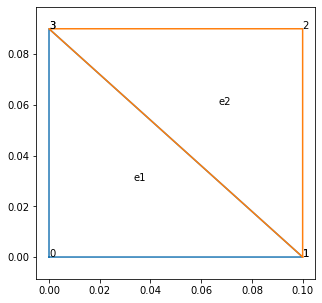

In [3]:
i = 0
n = 0

plt.figure(figsize=(5,5))

for e in elementos:
    plt.plot(e['x']+[e['x'][0]],e['y']+[e['y'][0]])
    x = np.array(e['x']).mean()
    y = np.array(e['y']).mean()
    plt.text(x,y,'e'+str(i+1))
    for x, y, n in zip(e['x'],e['y'],e['n']):
         plt.text(x,y,n)
    n = max(n, max(e['n']))
    i = i + 1
    
plt.axis('equal')
plt.show()

In [4]:
for e in elementos:
    A = (1/2)*np.abs(e['x'][0]*(e['y'][1] - e['y'][2]) + 
               e['x'][1]*(e['y'][2] - e['y'][0]) +
               e['x'][2]*(e['y'][0] - e['y'][1]))
    e.update(A=A)
    e.update(b1=e['y'][1]-e['y'][2])
    e.update(c1=e['x'][2]-e['x'][1])
    e.update(b2=e['y'][2]-e['y'][0])
    e.update(c2=e['x'][0]-e['x'][2])
    e.update(b3=e['y'][0]-e['y'][1])
    e.update(c3=e['x'][1]-e['x'][0])

In [5]:
elementos

[{'x': [0.0, 0.1, 0.0],
  'y': [0.0, 0.0, 0.09],
  'n': [0, 1, 3],
  'A': 0.0045,
  'b1': -0.09,
  'c1': -0.1,
  'b2': 0.09,
  'c2': 0.0,
  'b3': 0.0,
  'c3': 0.1},
 {'x': [0.1, 0.0, 0.1],
  'y': [0.0, 0.09, 0.09],
  'n': [1, 3, 2],
  'A': 0.0045,
  'b1': 0.0,
  'c1': 0.1,
  'b2': 0.09,
  'c2': 0.0,
  'b3': -0.09,
  'c3': -0.1}]

In [6]:
for e in elementos:
    K = np.zeros((3,3))
    for i in range(0,3):
        for j in range(0,3):
            K[i,j] = e['b{}'.format(i+1)]*e['b{}'.format(j+1)]+e['c{}'.format(i+1)]*e['c{}'.format(j+1)]
    K = k / 4 / e['A'] * K
    e.update({'K':K})
    F = np.array([0,0,0])
    e.update({'F':F})
    print(e)
   

{'x': [0.0, 0.1, 0.0], 'y': [0.0, 0.0, 0.09], 'n': [0, 1, 3], 'A': 0.0045, 'b1': -0.09, 'c1': -0.1, 'b2': 0.09, 'c2': 0.0, 'b3': 0.0, 'c3': 0.1, 'K': array([[ 70.38888889, -31.5       , -38.88888889],
       [-31.5       ,  31.5       ,   0.        ],
       [-38.88888889,   0.        ,  38.88888889]]), 'F': array([0, 0, 0])}
{'x': [0.1, 0.0, 0.1], 'y': [0.0, 0.09, 0.09], 'n': [1, 3, 2], 'A': 0.0045, 'b1': 0.0, 'c1': 0.1, 'b2': 0.09, 'c2': 0.0, 'b3': -0.09, 'c3': -0.1, 'K': array([[ 38.88888889,   0.        , -38.88888889],
       [  0.        ,  31.5       , -31.5       ],
       [-38.88888889, -31.5       ,  70.38888889]]), 'F': array([0, 0, 0])}


In [7]:
elementos

[{'x': [0.0, 0.1, 0.0],
  'y': [0.0, 0.0, 0.09],
  'n': [0, 1, 3],
  'A': 0.0045,
  'b1': -0.09,
  'c1': -0.1,
  'b2': 0.09,
  'c2': 0.0,
  'b3': 0.0,
  'c3': 0.1,
  'K': array([[ 70.38888889, -31.5       , -38.88888889],
         [-31.5       ,  31.5       ,   0.        ],
         [-38.88888889,   0.        ,  38.88888889]]),
  'F': array([0, 0, 0])},
 {'x': [0.1, 0.0, 0.1],
  'y': [0.0, 0.09, 0.09],
  'n': [1, 3, 2],
  'A': 0.0045,
  'b1': 0.0,
  'c1': 0.1,
  'b2': 0.09,
  'c2': 0.0,
  'b3': -0.09,
  'c3': -0.1,
  'K': array([[ 38.88888889,   0.        , -38.88888889],
         [  0.        ,  31.5       , -31.5       ],
         [-38.88888889, -31.5       ,  70.38888889]]),
  'F': array([0, 0, 0])}]

In [8]:
# Condiciones de frontera en el elemento 1

H1 = h * 0.1 /6 * np.array([[2,1,0],[1,2,0],[0,0,0]])

e1['K'] = e1['K'] + H1

In [9]:
F1 = h * T_inf * 0.1 / 2 * np.array([1,1,0])

e1['F'] = e1['F'] + F1

In [10]:
F1

array([110., 110.,   0.])

In [11]:
print(e1['K'])

[[ 74.05555556 -29.66666667 -38.88888889]
 [-29.66666667  35.16666667   0.        ]
 [-38.88888889   0.          38.88888889]]


In [12]:
e1['F']

array([110., 110.,   0.])

In [13]:
elementos

[{'x': [0.0, 0.1, 0.0],
  'y': [0.0, 0.0, 0.09],
  'n': [0, 1, 3],
  'A': 0.0045,
  'b1': -0.09,
  'c1': -0.1,
  'b2': 0.09,
  'c2': 0.0,
  'b3': 0.0,
  'c3': 0.1,
  'K': array([[ 74.05555556, -29.66666667, -38.88888889],
         [-29.66666667,  35.16666667,   0.        ],
         [-38.88888889,   0.        ,  38.88888889]]),
  'F': array([110., 110.,   0.])},
 {'x': [0.1, 0.0, 0.1],
  'y': [0.0, 0.09, 0.09],
  'n': [1, 3, 2],
  'A': 0.0045,
  'b1': 0.0,
  'c1': 0.1,
  'b2': 0.09,
  'c2': 0.0,
  'b3': -0.09,
  'c3': -0.1,
  'K': array([[ 38.88888889,   0.        , -38.88888889],
         [  0.        ,  31.5       , -31.5       ],
         [-38.88888889, -31.5       ,  70.38888889]]),
  'F': array([0, 0, 0])}]

In [14]:
#Ensamble de la matriz de conducxtividad
K = np.zeros((n+1,n+1))
F = np.zeros((n+1))

for e in elementos:
    for i, j in enumerate(e['n']):
        for k, m in enumerate(e['n']):
            #print(j,m)
            K[j,m] = K[j,m] + e['K'][i,k]
        F[j] = F[j] + e['F'][i]

sp.Matrix(K)

⎡74.0555555555556   -29.6666666666667         0.0         -38.8888888888889⎤
⎢                                                                          ⎥
⎢-29.6666666666667  74.0555555555556   -38.8888888888889         0.0       ⎥
⎢                                                                          ⎥
⎢       0.0         -38.8888888888889  70.3888888888889         -31.5      ⎥
⎢                                                                          ⎥
⎣-38.8888888888889         0.0               -31.5        70.3888888888889 ⎦

In [15]:
sp.Matrix(F)

⎡110.0⎤
⎢     ⎥
⎢110.0⎥
⎢     ⎥
⎢ 0.0 ⎥
⎢     ⎥
⎣ 0.0 ⎦

In [16]:
# Condición La temperatura conocida

Tf = np.array([None] * int(n+1), dtype=np.float)

Tf[2] = 100
Tf[3] = 100

Tf

C:\Users\uie70742\AppData\Local\Temp/ipykernel_36664/2642913476.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Tf = np.array([None] * int(n+1), dtype=np.float)


array([ nan,  nan, 100., 100.])

In [17]:
for i, t in enumerate(Tf):
    if not np.isnan(t):
        for j in range(n+1):
            K[i,j] = 0
            if i == j:
                K[i,j] = 1
            F[i] = t
            
sp.Matrix(K)

⎡74.0555555555556   -29.6666666666667         0.0         -38.8888888888889⎤
⎢                                                                          ⎥
⎢-29.6666666666667  74.0555555555556   -38.8888888888889         0.0       ⎥
⎢                                                                          ⎥
⎢       0.0                0.0                1.0                0.0       ⎥
⎢                                                                          ⎥
⎣       0.0                0.0                0.0                1.0       ⎦

In [18]:
F

array([110., 110., 100., 100.])

In [19]:
# K*T = F

In [20]:
T = np.linalg.solve(K,F)
sp.Matrix(T)

⎡90.0876095118899⎤
⎢                ⎥
⎢90.0876095118899⎥
⎢                ⎥
⎢     100.0      ⎥
⎢                ⎥
⎣     100.0      ⎦

## 14 de noviembre examen 2